In [1]:
#importing essential libraried
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

##Data Understanding

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.shape

(10530, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10530 entries, 0 to 10529
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10530 non-null  int64  
 1   NAME                            10466 non-null  object 
 2   host id                         10530 non-null  int64  
 3   host_identity_verified          10435 non-null  object 
 4   host name                       10502 non-null  object 
 5   neighbourhood group             10503 non-null  object 
 6   neighbourhood                   10514 non-null  object 
 7   lat                             10522 non-null  float64
 8   long                            10522 non-null  float64
 9   country                         10480 non-null  object 
 10  country code                    10451 non-null  object 
 11  instant_bookable                10451 non-null  object 
 12  cancellation_policy             

In [6]:
df.duplicated().value_counts()

,count
False,10530


In [7]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,license
count,1.053000e+04,1.053000e+04,10522.000000,10522.000000,10387.000000,10432.000000,10516.000000,9092.000000,10430.000000,10506.000000,10381.000000,0.0
mean,3.908919e+06,4.920081e+10,40.728839,-73.958891,2012.404352,8.608033,44.569038,0.875665,3.011026,2.605464,208.335228,NaN
std,1.678933e+06,2.850224e+10,0.052226,0.035971,5.773334,44.599074,68.307632,1.164011,1.420969,7.043251,126.029222,NaN
min,1.001254e+06,1.316021e+08,40.508680,-74.239860,2003.000000,-12.000000,0.000000,0.010000,1.000000,1.000000,-10.000000,NaN
25%,2.455128e+06,2.446708e+10,40.688513,-73.983557,2007.000000,2.000000,2.000000,0.110000,2.000000,1.000000,99.000000,NaN
50%,3.908920e+06,4.890528e+10,40.722120,-73.958900,2012.000000,3.000000,13.000000,0.370000,3.000000,1.000000,210.000000,NaN
75%,5.362711e+06,7.398742e+10,40.763697,-73.942950,2017.000000,5.000000,58.000000,1.200000,4.000000,2.000000,318.000000,NaN
max,6.816503e+06,9.873673e+10,40.908040,-73.729010,2022.000000,3455.000000,607.000000,13.450000,5.000000,121.000000,426.000000,NaN


##Data Cleaning

In [8]:
#drop duplicate records
df.drop_duplicates(inplace=True)

In [9]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [10]:
df['price'] = df['price'].str.replace('$','',regex = False)
df['service fee'] = df['service fee'].str.replace('$','',regex=False)

In [11]:
df['price'] = df['price'].str.replace(',','',regex = False)
df['service fee'] = df['service fee'].str.replace(',','',regex=False)

In [12]:
df.rename(columns={'price' : 'price_$',
                   'service fee' : 'service_fee_$'},inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
#change all mismatched datatypes
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

/tmp/ipython-input-2463647750.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [15]:
df = df.drop(df[df['availability 365']>500].index)

In [16]:
df.duplicated().value_counts()

,count
False,8501


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8501 entries, 0 to 10527
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8501 non-null   object        
 1   NAME                            8501 non-null   object        
 2   host id                         8501 non-null   object        
 3   host_identity_verified          8501 non-null   object        
 4   host name                       8501 non-null   object        
 5   neighbourhood group             8501 non-null   object        
 6   neighbourhood                   8501 non-null   object        
 7   lat                             8501 non-null   float64       
 8   long                            8501 non-null   float64       
 9   country                         8501 non-null   object        
 10  country code                    8501 non-null   object        
 11  instant_

##Exploratory data analysis(EDA)

In [18]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8501.000000,8501.000000,8501.000000,8501.000000,8501.000000,8501.000000,8501.000000,8501,8501.000000,8501.000000,8501.000000,8501.000000
mean,40.728576,-73.958123,2012.432890,621.053994,124.214210,7.888366,49.427597,2018-03-14 07:08:43.844253440,0.870803,3.009999,2.700388,208.604282
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687980,-73.983360,2008.000000,324.000000,65.000000,2.000000,5.000000,2016-10-24 00:00:00,0.110000,2.000000,1.000000,99.000000
50%,40.721560,-73.958390,2012.000000,620.000000,124.000000,3.000000,18.000000,2019-01-03 00:00:00,0.360000,3.000000,1.000000,210.000000
75%,40.763760,-73.942190,2017.000000,913.000000,183.000000,5.000000,66.000000,2019-06-17 00:00:00,1.180000,4.000000,2.000000,317.000000
max,40.908040,-73.729010,2022.000000,1200.000000,240.000000,1250.000000,607.000000,2022-05-21 00:00:00,13.450000,5.000000,121.000000,426.000000
std,0.052671,0.036580,5.762832,336.803851,67.366598,25.704207,68.988770,NaN,1.172219,1.423672,6.959208,125.806592


In [19]:
#different property types:
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,5005
Private room,3390
Shared room,106


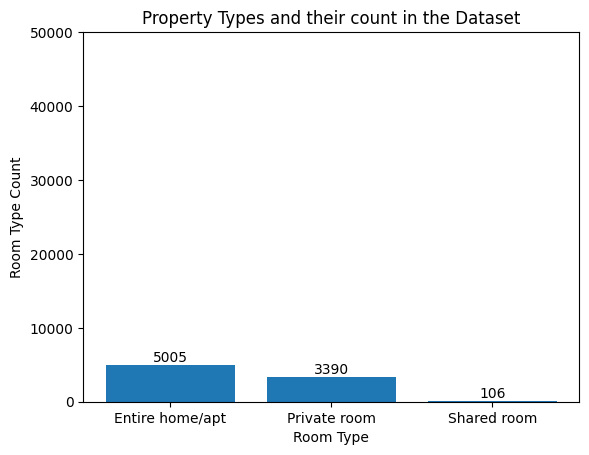

In [20]:
room_type_bar = plt.bar(property_types.index,property_types.loc[:,'count']);
plt.bar_label(room_type_bar,labels = property_types.loc[:,'count']);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');


In [21]:
#neighbourhood group with highest number of listing:
hood_group  = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,3855
Manhattan,3823
Queens,666
Bronx,118
Staten Island,38
brookln,1


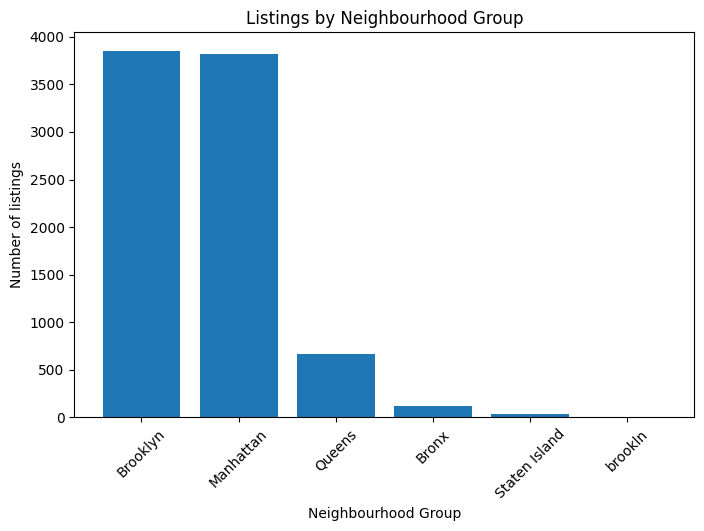

Insight: Most listings are in: Brooklyn


In [23]:
#EDA: Listings by neighbourhood_group
if 'neighbourhood group' in df.columns:
    counts = df['neighbourhood group'].value_counts()
    fig = plt.figure(figsize=(8,5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title('Listings by Neighbourhood Group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Number of listings')
    plt.xticks(rotation=45)
    plt.show()
    print("Insight: Most listings are in:", counts.idxmax())


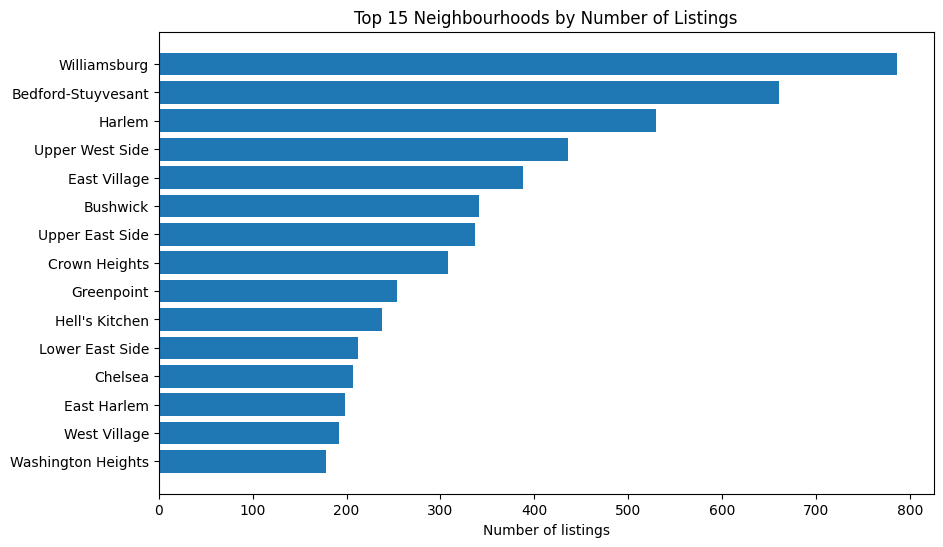

Insight: Top neighbourhood (by listings): Williamsburg


In [26]:
# EDA: Top neighbourhoods (by listing count)
if 'neighbourhood' in df.columns:
    top_neigh = df['neighbourhood'].value_counts().head(15)
    fig = plt.figure(figsize=(10,6))
    plt.barh(top_neigh.index[::-1].astype(str), top_neigh.values[::-1])
    plt.title('Top 15 Neighbourhoods by Number of Listings')
    plt.xlabel('Number of listings')
    plt.show()
    print("Insight: Top neighbourhood (by listings):", top_neigh.index[0])


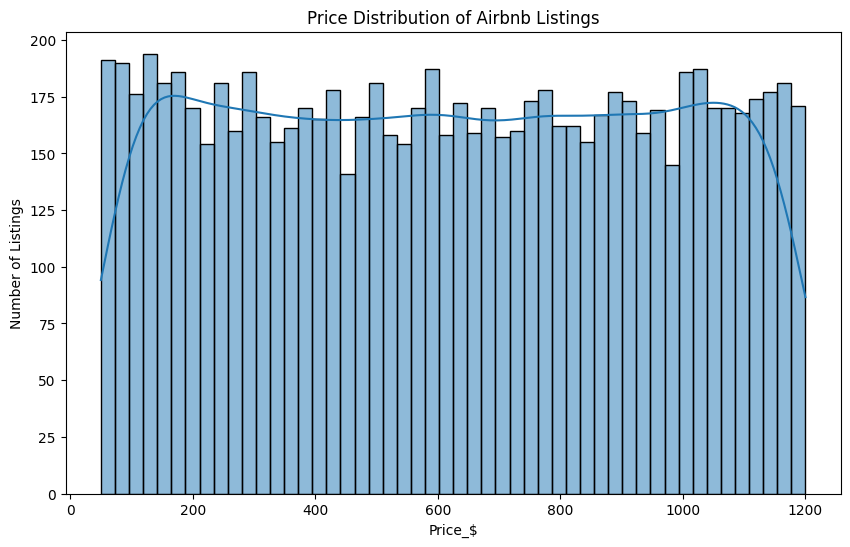

In [25]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price_$'], bins=50, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price_$')
plt.ylabel('Number of Listings')
plt.show()

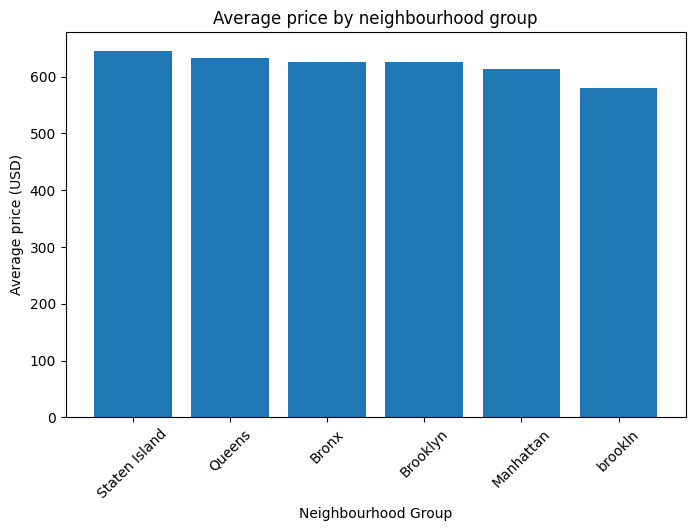

Insight: Highest avg price neighbourhood group: Staten Island -> $ 645.84


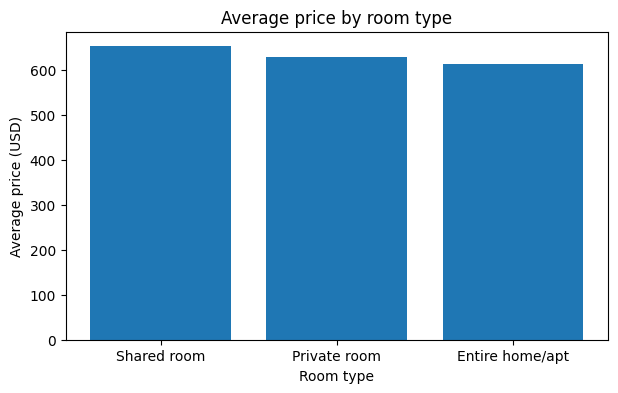

Insight: Most expensive room type (avg): Shared room


In [31]:
#EDA: Avg price by neighbourhood_group & by room_type
if 'price_$' in df.columns and 'neighbourhood group' in df.columns:
    avg_grp = df.groupby('neighbourhood group')['price_$'].mean().dropna().sort_values(ascending=False)
    fig = plt.figure(figsize=(8,5))
    plt.bar(avg_grp.index.astype(str), avg_grp.values)
    plt.title('Average price by neighbourhood group')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Average price (USD)')
    plt.xticks(rotation=45)
    plt.show()
    print("Insight: Highest avg price neighbourhood group:", avg_grp.idxmax(), "-> $", round(avg_grp.max(),2))

if 'price_$' in df.columns and 'room type' in df.columns:
    avg_room = df.groupby('room type')['price_$'].mean().dropna().sort_values(ascending=False)
    fig = plt.figure(figsize=(7,4))
    plt.bar(avg_room.index.astype(str), avg_room.values)
    plt.title('Average price by room type')
    plt.xlabel('Room type')
    plt.ylabel('Average price (USD)')
    plt.show()
    print("Insight: Most expensive room type (avg):", avg_room.idxmax())


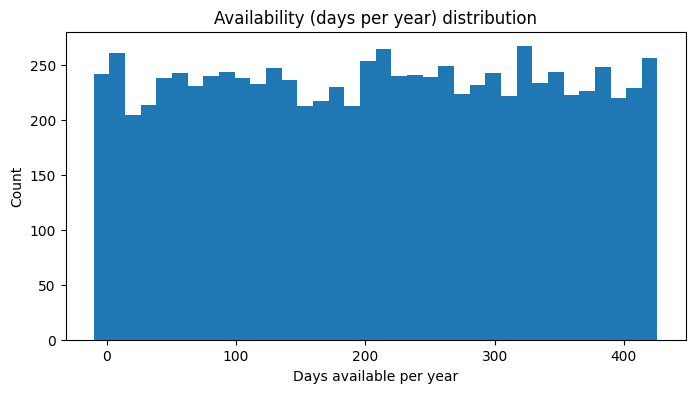

Insight: Median availability: 210.0


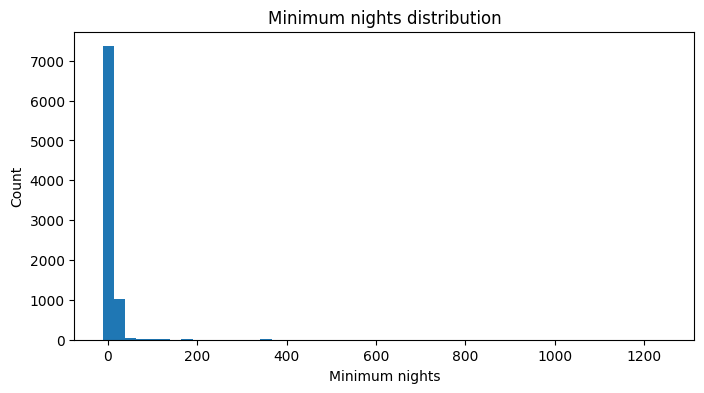

Insight: Many listings have minimum_nights near: 2.0


In [34]:
#EDA: Availability & minimum nights distributions
if 'availability 365' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['availability 365'].dropna(), bins=36)
    plt.title('Availability (days per year) distribution')
    plt.xlabel('Days available per year')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Median availability:", df['availability 365'].median())

if 'minimum nights' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['minimum nights'].dropna(), bins=50)
    plt.title('Minimum nights distribution')
    plt.xlabel('Minimum nights')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Many listings have minimum_nights near:", df['minimum nights'].mode().iloc[0])


In [33]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

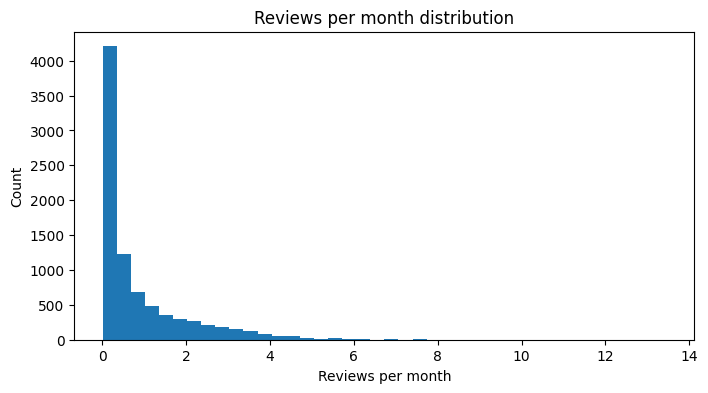

Insight: Mean reviews per month: 0.87


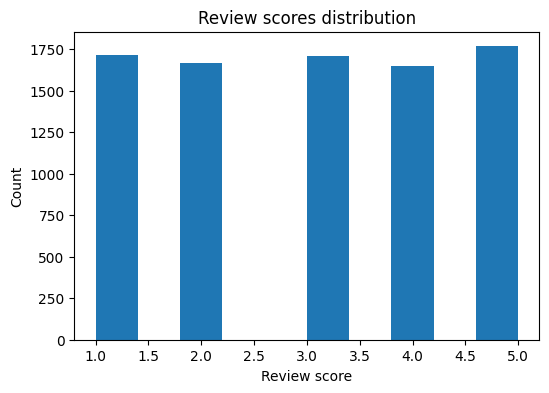

Insight: Typical review score (mode): 5.0


In [35]:
#EDA: Reviews & review_rate_number
if 'reviews per month' in df.columns:
    fig = plt.figure(figsize=(8,4))
    plt.hist(df['reviews per month'].dropna(), bins=40)
    plt.title('Reviews per month distribution')
    plt.xlabel('Reviews per month')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Mean reviews per month:", round(df['reviews per month'].mean(),2))

if 'review rate number' in df.columns:
    fig = plt.figure(figsize=(6,4))
    plt.hist(df['review rate number'].dropna(), bins=10)
    plt.title('Review scores distribution')
    plt.xlabel('Review score')
    plt.ylabel('Count')
    plt.show()
    print("Insight: Typical review score (mode):", df['review rate number'].mode().iloc[0])


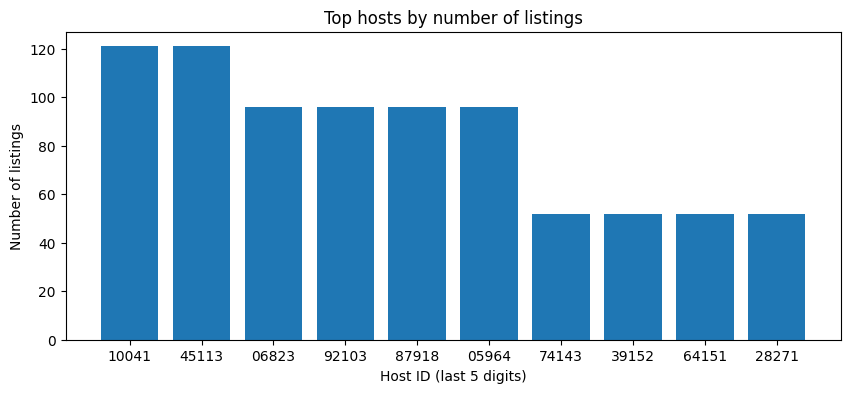

Insight: Top host has 121.0 listings (host id: 50445710041 )


In [37]:
# Top hosts by listings
if 'host id' in df.columns and 'calculated host listings count' in df.columns:
    top_hosts = (
        df.groupby('host id')['calculated host listings count']
        .max()
        .sort_values(ascending=False)
        .head(10)
    )

    # Convert IDs to shorter strings (last 5 digits)
    labels = [str(hid)[-5:] for hid in top_hosts.index]

    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(labels, top_hosts.values)
    ax.set_title('Top hosts by number of listings')
    ax.set_xlabel('Host ID (last 5 digits)')
    ax.set_ylabel('Number of listings')
    plt.show()

    print("Insight: Top host has", top_hosts.iloc[0], "listings (host id:", top_hosts.index[0], ")")


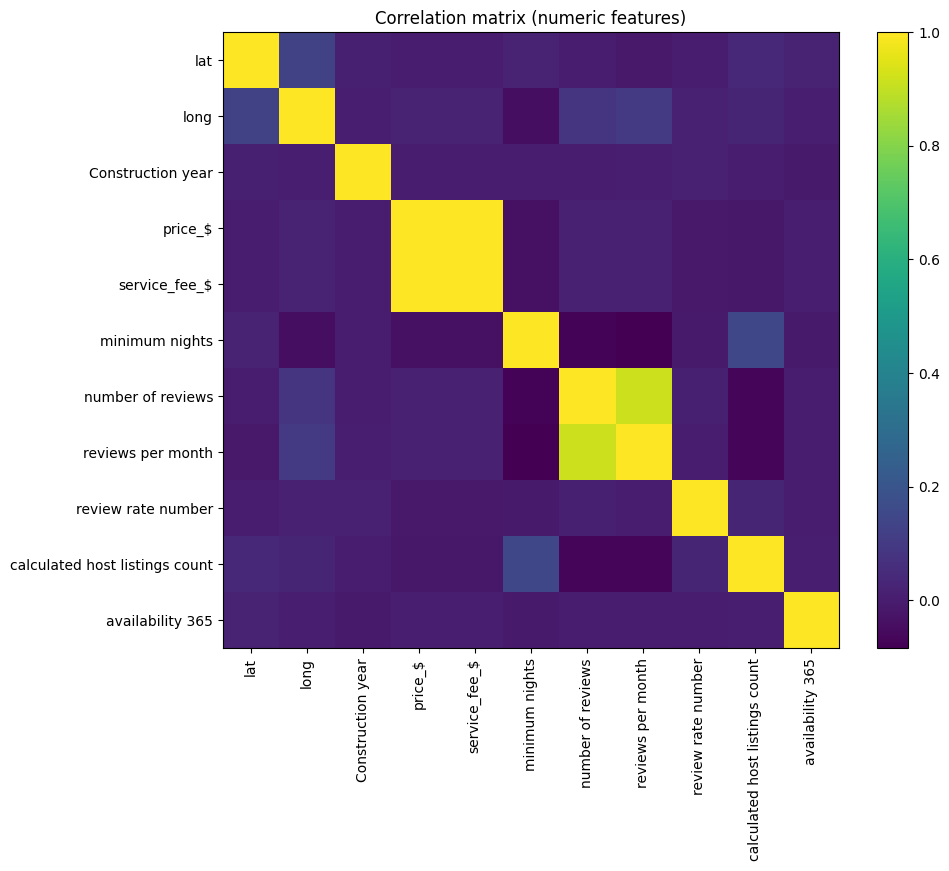

Insight: Look for values near 1 or -1 to find strong relationships.


In [38]:
#  Correlation heatmap (numeric columns) using matplotlib imshow
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    fig = plt.figure(figsize=(10,8))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title('Correlation matrix (numeric features)')
    plt.show()
    print("Insight: Look for values near 1 or -1 to find strong relationships.")


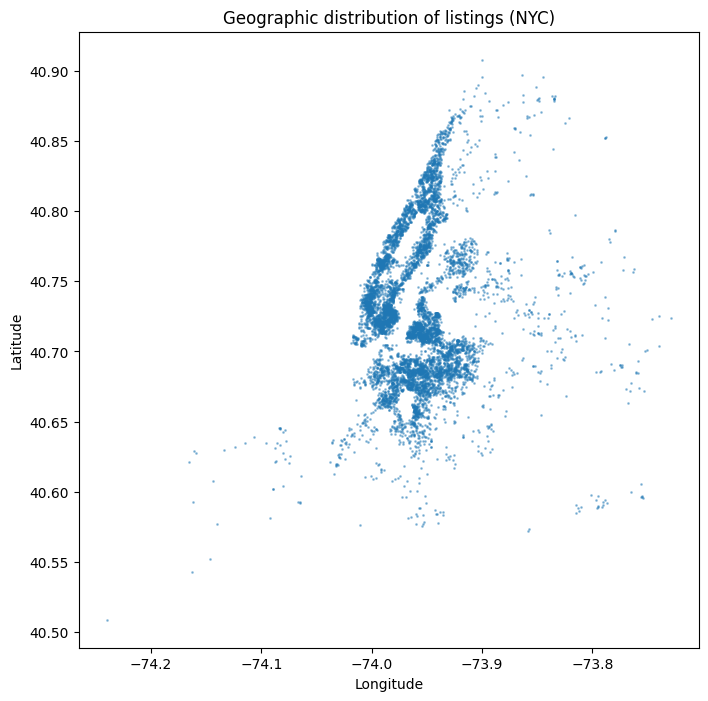

In [40]:
#Geographic scatter (latitude vs longitude)
if 'long' in df.columns and 'lat' in df.columns:
    fig = plt.figure(figsize=(8,8))
    plt.scatter(df['long'].dropna(), df['lat'].dropna(), s=1, alpha=0.4)
    plt.title('Geographic distribution of listings (NYC)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()